In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [9]:
wxdataLax = pd.read_csv('./weatherdata2018.csv') 
wxdataBtv = pd.read_csv('./weatherdata2018btv.csv') 
wxdataDen = pd.read_csv('./weatherdata2018den.csv') 

#clean LAX:

wxdataLax['monthKey'] = wxdataLax.dateKey//100
wxdataLax['windSpeedbucket'] = (wxdataLax.windGust//3)*3
wxdataLax['tempbucket'] = (wxdataLax.temperature//10)*10
wxdataLax['humiditybucket'] = (wxdataLax.humidity*100//10)*10



#clean Den:
wxdataDen['monthKey'] = wxdataDen.dateKey//100
wxdataDen['windSpeedbucket'] = (wxdataDen.windGust//3)*3
wxdataDen['tempbucket'] = (wxdataDen.temperature//10)*10
wxdataDen['humiditybucket'] = ((wxdataDen.humidity*100)//10)*10

#clean Btv:
wxdataBtv['monthKey'] = wxdataBtv.dateKey//100
wxdataBtv['windSpeedbucket'] = (wxdataBtv.windGust//3)*3
wxdataBtv['tempbucket'] = (wxdataBtv.temperature//10)*10
wxdataBtv['humiditybucket'] = (wxdataBtv.humidity*100//10)*10

   

In [10]:
names =['', 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep', 'Oct','Nov','Dec']

In [11]:
#now put it in a function for "production"
def showWeather(city, metric):
    #process city input
    if(city=='Lax'):
        wxdata = wxdataLax
    elif(city=='Den'):
        wxdata = wxdataDen
    elif(city=='Btv'):
        wxdata = wxdataBtv
    
    #process metric input
    ylims=[0,500]
    if(metric=='temp'):
        groupCol = 'tempbucket'
        if(city=='Btv'):
            ylims=[0,250]
    elif(metric == 'wind'):
        groupCol = 'windSpeedbucket'
    elif(metric == 'icon'):
        groupCol = 'icon'
    elif(metric == 'humidity'):
        groupCol = 'humiditybucket'
        
    #time edge cases because of GMT/EST/MST/PST - limit to 2018
    wxSub = wxdata[(wxdata.dateKey > 20180000) & (wxdata.dateKey < 20190000)]

    #need to know how many charts we're going to make so we can do setup 
    chartCount = len(wxSub.groupby(groupCol)[groupCol].nunique().index)
    
    #build the subplots (a matplotlib figure with chartcount axes)
    fig, ax = plt.subplots(nrows=chartCount, figsize=(15, 20))

    #loop through axes and do some setup
    for i in range(0,chartCount):
        ax[i].set_xticklabels(names)
        ax[i].xaxis.set_major_locator(MultipleLocator(1))
        ax[i].set_ylim(ylims)
        ax[i].margins(y=5)
    #tun the histogram
    wxSub.hist(ax=ax, column='monthKey', by=[groupCol], range=(201801, 201813), bins=12, facecolor='green', edgecolor='black')
    if(metric=='temp'):
        for i in range(0,chartCount):
            oldTitle = ax[i].get_title()
            oldTitleInt = int(float(oldTitle))
            ax[i].set_title( str(oldTitleInt) + " - " + str((oldTitleInt + 9)) + " degrees")
    if(metric=='humidity'):
        for i in range(0,chartCount):
            oldTitle = ax[i].get_title()
            oldTitleInt = int(float(oldTitle))
            ax[i].set_title( str(oldTitleInt) + " - " + str((oldTitleInt + 9)) + " % Humidity")
    if(metric=='wind'):
        for i in range(0,chartCount):
            oldTitle = ax[i].get_title()
            oldTitleInt = int(float(oldTitle))
            ax[i].set_title( str(oldTitleInt) + " - " + str((oldTitleInt + 2)) + " MPH")
    #ensure charts don't overlap
    plt.tight_layout()


In [15]:
#show the count of hours with the temp in each 10 degree bucket, by month of 2018
#yep: it was -20F in Jan 
#showWeather('Btv', 'temp')

#can also do:
#showWeather('Btv', 'humidity') #shows each decile of humidity
#showWeather('Btv', 'icon') #shows high top level current conditions (clear, rain, snow, etc)
#showWeather('Btv', 'temp') #shows counts of hours in each 10 degree range
#showWeather('Btv', 'wind') #shows wind speeds





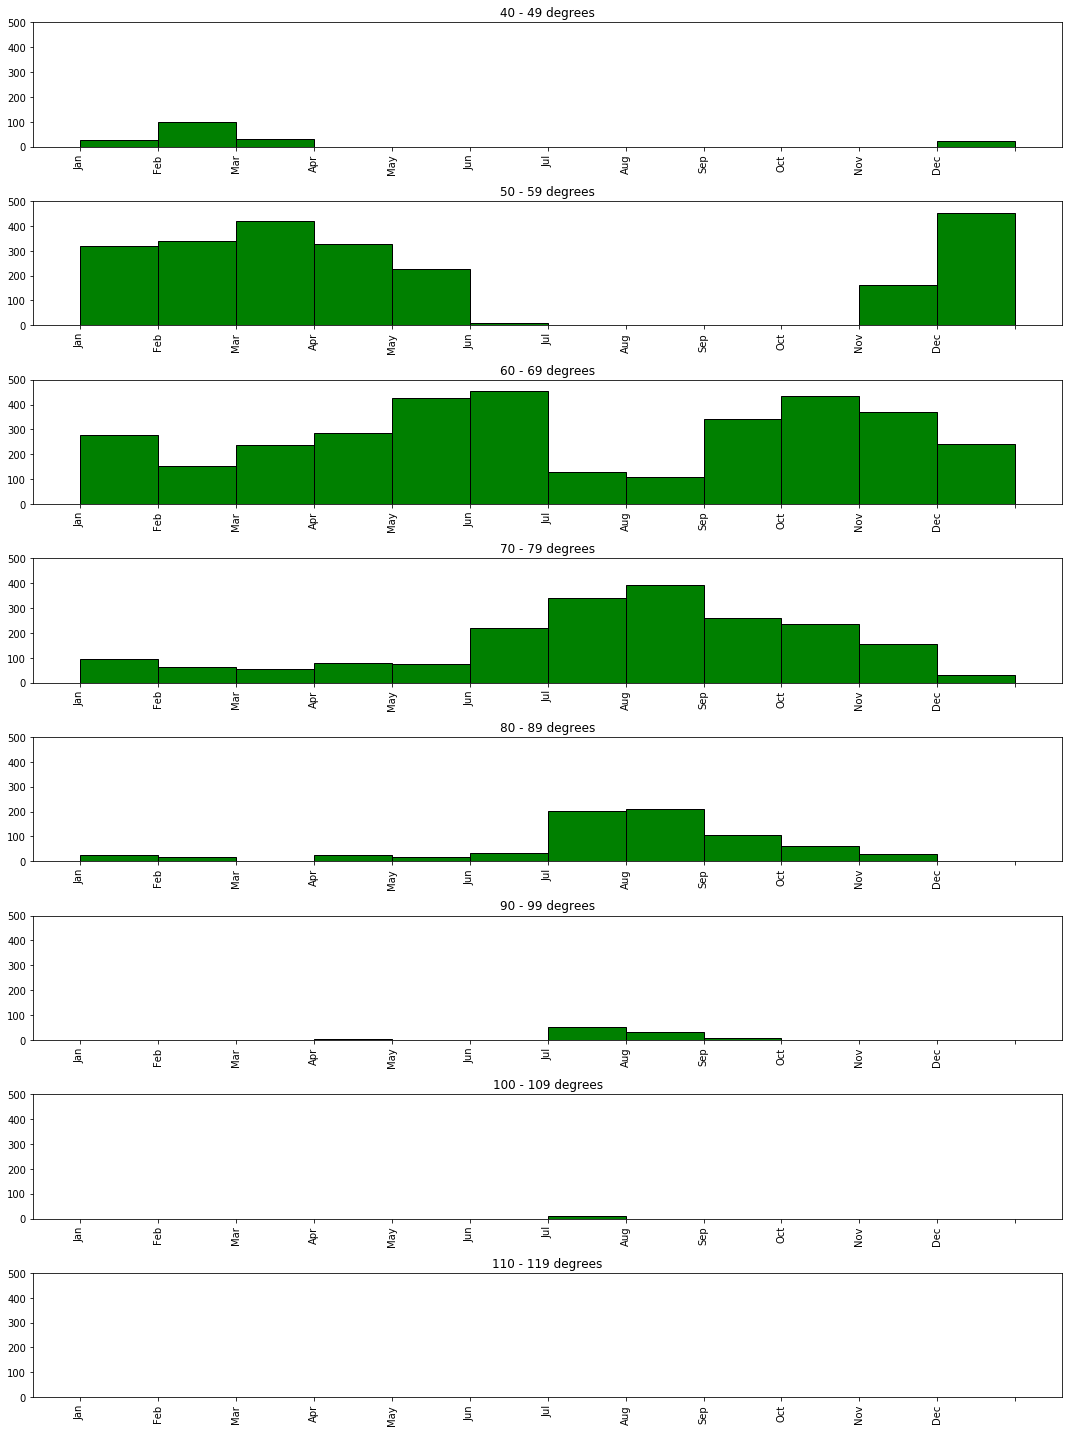

In [13]:
#show the count of hours with the temp in each 10 degree bucket, by month of 2018
#yep: temp exceeded 110 in July,  Lowest temp was in the 40s!
showWeather('Lax', 'temp')


In [14]:
#show the count of hours with the temp in each 10 degree bucket, by month of 2018
#yep: range from the single digits (rarely in Jan/Feb) to 90s anytime between June and Sept
#showWeather('Den', 'temp')